In [1]:
import sys
sys.path.append("../")
from sir.discretemodel import *
import numpy as np 
from numpy.random import randint, rand
import matplotlib.pyplot as plt
from sir.discretemodelspatial import *

In [ ]:
# Nice graph, everyone gets sick: b = 0.0001, k = 0.01
b = 0.0001
k = 0.01
counts_sus, counts_inf, counts_rec = run_simulation(b, k, T=600, N=1000)
plt.plot(counts_sus, label='Susceptible')
plt.plot(counts_inf, label='Infected')
plt.plot(counts_rec, label='Recovered')
plt.xlabel('t')
plt.ylabel('pop')
plt.title('SIR Discrete with b = {} and k = {}'.format(b, k))
plt.legend()
plt.show()

# No one gets sick: b = 0.0001 and k = 0.1
b = 0.0001
k = 0.1
counts_sus, counts_inf, counts_rec = run_simulation(b, k, T=600, N=1000)
plt.plot(counts_sus, label='Susceptible')
plt.plot(counts_inf, label='Infected')
plt.plot(counts_rec, label='Recovered')
plt.xlabel('t')
plt.ylabel('pop')
plt.title('SIR Discrete with b = {} and k = {}'.format(b, k))
plt.legend()
plt.show()

# Slow recovery: b = 0.0003 and k = 0.001
b = 0.0003
k = 0.001
counts_sus, counts_inf, counts_rec = run_simulation(b, k, T=600, N=1000)
plt.plot(counts_sus, label='Susceptible')
plt.plot(counts_inf, label='Infected')
plt.plot(counts_rec, label='Recovered')
plt.xlabel('t')
plt.ylabel('pop')
plt.title('SIR Discrete with b = {} and k = {}'.format(b, k))
plt.legend()
plt.show()

# Not everyone gets sick: b = 0.0001 and k = 0.035
b = 0.0001
k = 0.035
counts_sus, counts_inf, counts_rec = run_simulation(b, k, T=600, N=1000)
plt.plot(counts_sus, label='Susceptible')
plt.plot(counts_inf, label='Infected')
plt.plot(counts_rec, label='Recovered')
plt.xlabel('t')
plt.ylabel('pop')
plt.title('SIR Discrete with b = {} and k = {}'.format(b, k))
plt.legend()
plt.show()

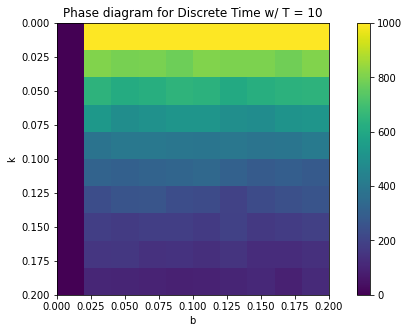

In [18]:
# Phase Diagram Code
bs = np.linspace(0, 0.2, 10)
ks = np.linspace(0, 0.2, 10)

cts = np.zeros((len(bs), len(ks))) # create matrix of zeros
for i, k in enumerate(ks): 
    for j, b in enumerate(bs):
        cts[i,j] = run_simulation_phase(b, k, T=10) # assign counts of infected to each element
plt.figure(figsize=(10,5))
plt.imshow(cts, extent=[np.min(bs), np.max(bs), np.max(ks), np.min(ks)])
plt.colorbar()
plt.xlabel('b')
plt.ylabel('k')
plt.title('Phase diagram for Discrete Time w/ T = 10')
plt.show()

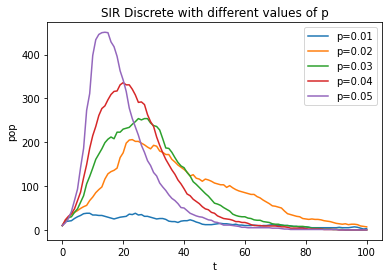

In [21]:
# We choose k and b based on the phase diagram
k = 0.1
b = 0.075
q = np.sqrt(1/(np.pi*100)*b)
p = [0.01, 0.02, 0.03, 0.04, 0.05]
for i in p:
    counts_sus, counts_inf, counts_rec = discrete_spatial_simulation(k, q, p=i, t=100, n=1000, num_agents=10)
    plt.plot(counts_inf, label='p={}'.format(i))
plt.xlabel('t')
plt.ylabel('pop')
plt.title('SIR Discrete with different values of p')
plt.legend()
plt.show()
# So we choose p=0.03


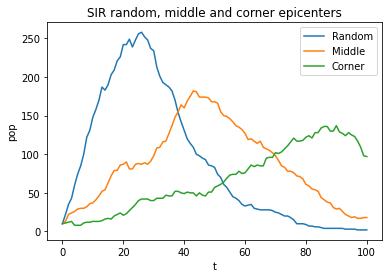

In [24]:
k = 0.1
b = 0.075
q = np.sqrt(1/(np.pi*100)*b)
# Random
counts_sus, counts_inf, counts_rec = discrete_spatial_simulation(k, q, p=0.03, t=100, n=1000, num_agents=10)
plt.plot(counts_inf, label='Random')
# Middle
counts_sus, counts_inf, counts_rec = discrete_spatial_simulation(k, q, p=0.03, t=100, n=1000, position='middle', num_agents=10)
plt.plot(counts_inf, label='Middle')
# Corner
counts_sus, counts_inf, counts_rec = discrete_spatial_simulation(k, q, p=0.03, t=100, n=1000, position='corner', num_agents=10)
plt.plot(counts_inf, label='Corner')
plt.xlabel('t')
plt.ylabel('pop')
plt.title('SIR random, middle and corner epicenters')
plt.legend()
plt.show()

In [47]:
center = True
pop = [Agent() for i in range(100)] # Generates our population
if center:
    init_positions = []
    for i in pop:
        init_positions.append(i.pos)
        
    print()
    init_positions = np.array(init_positions)
    i = find_center(init_positions)
#         pop[i].change_state()
print(pop[i].pos)


[0.54362553 0.53629527]
